Final Model


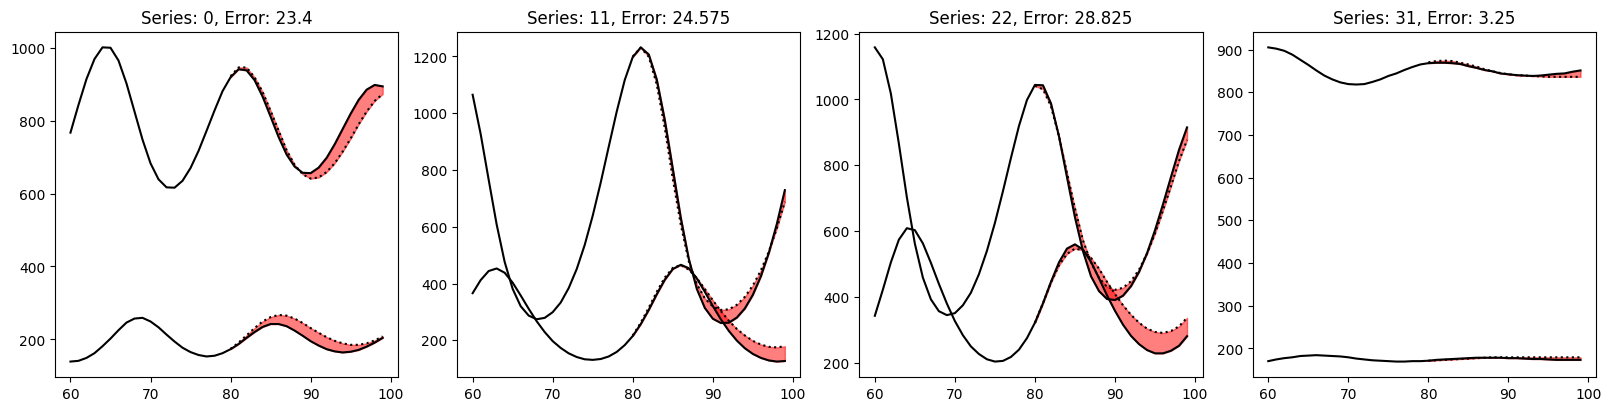

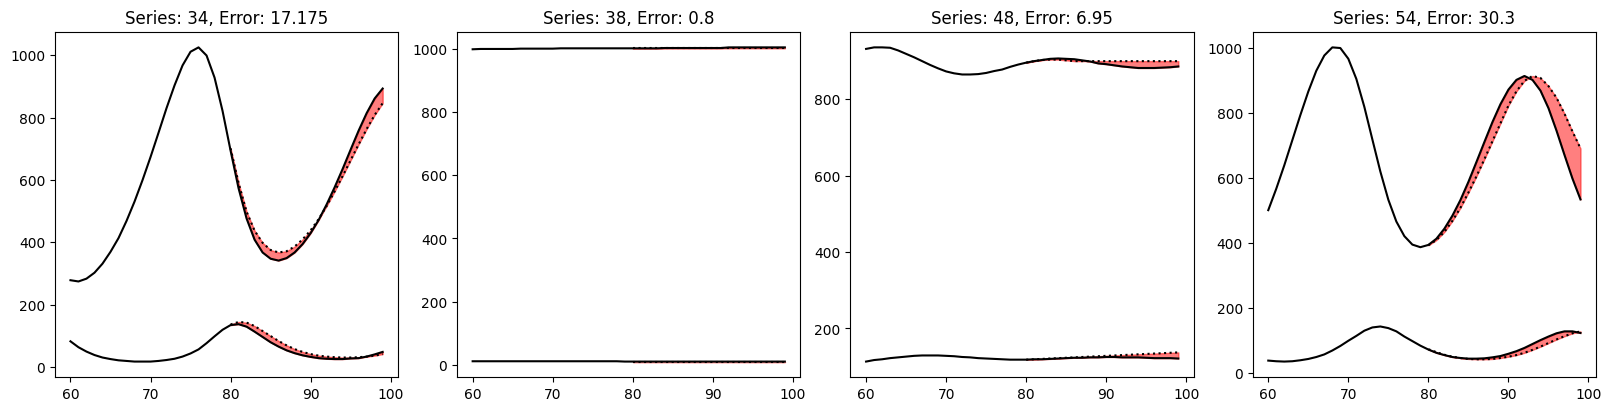

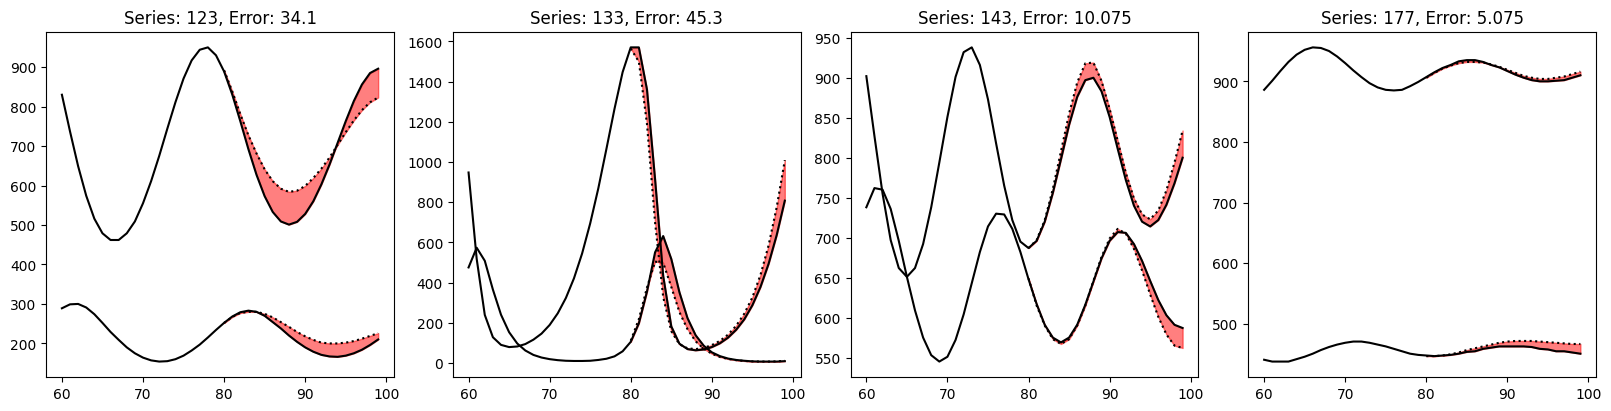

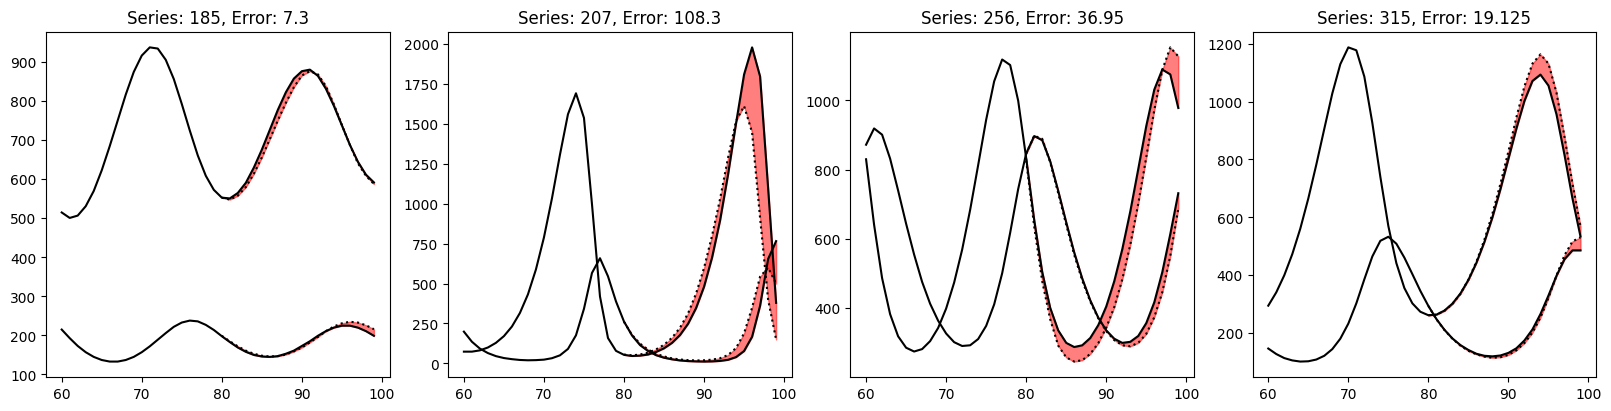

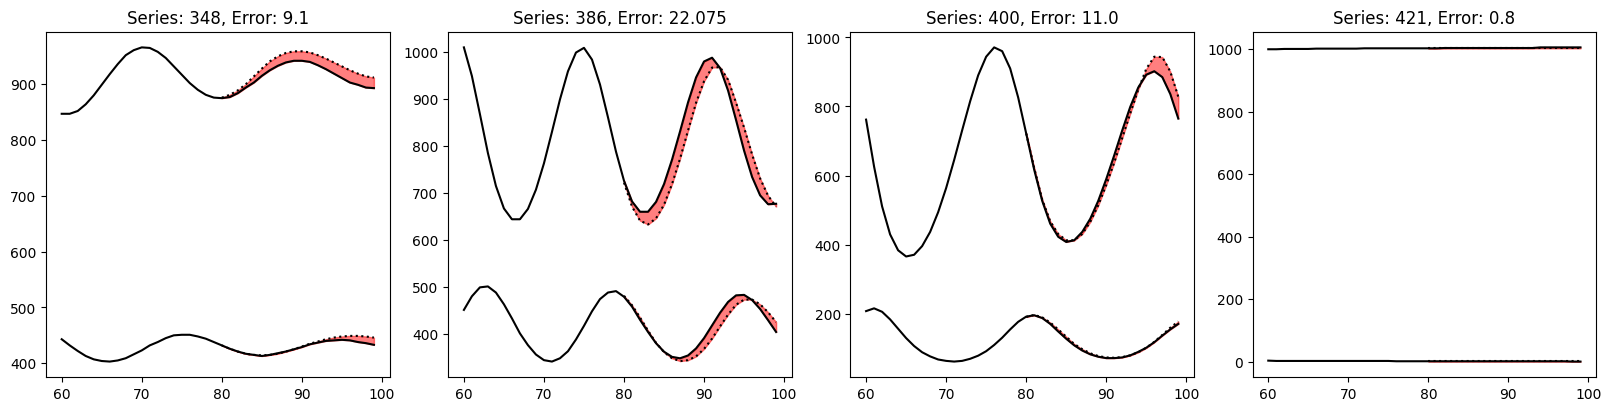

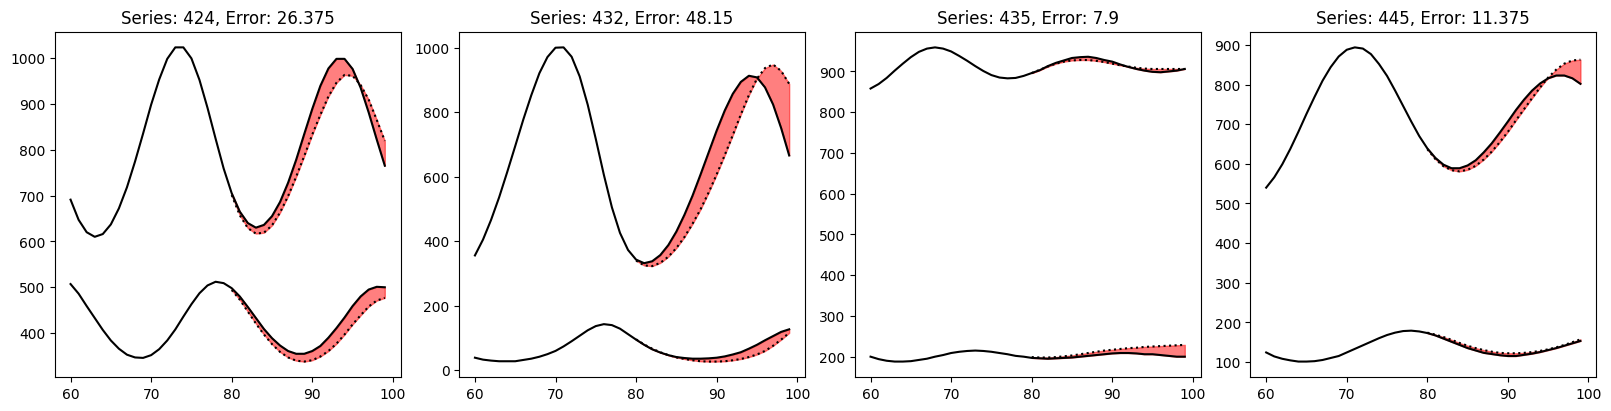

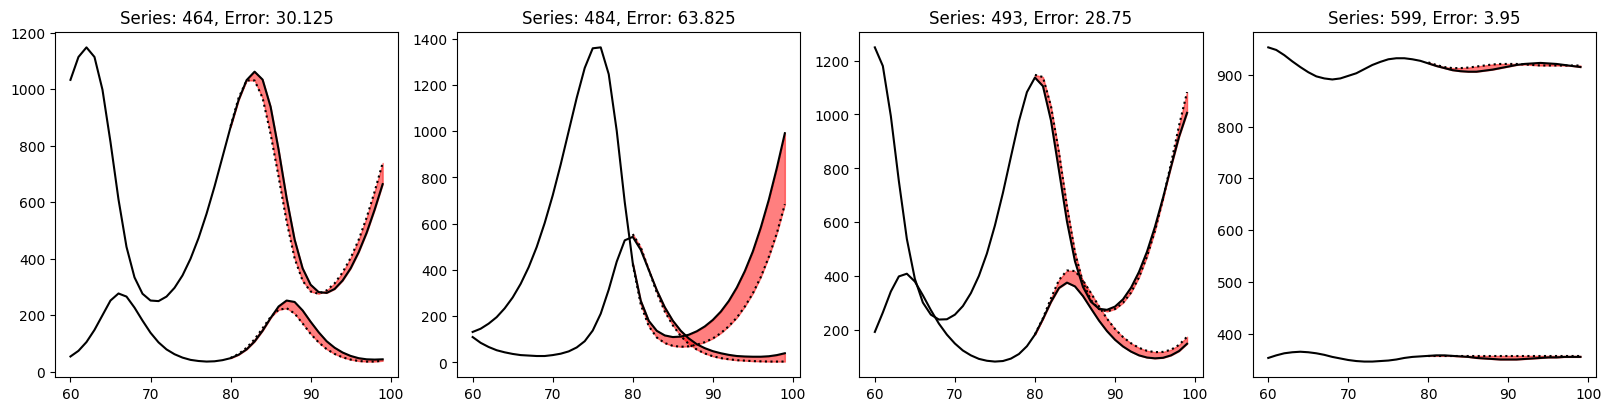

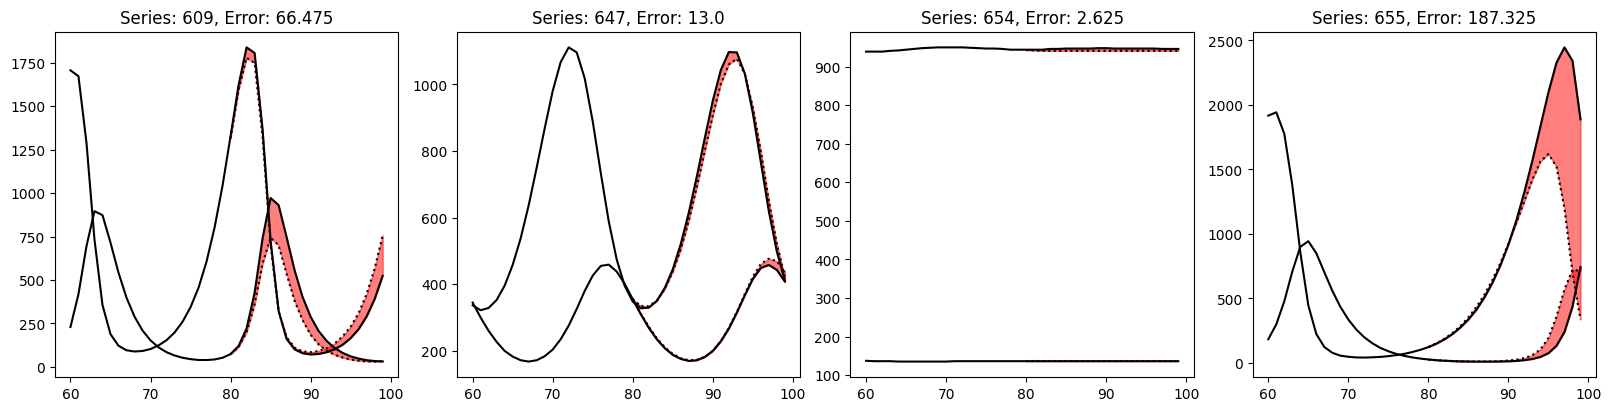

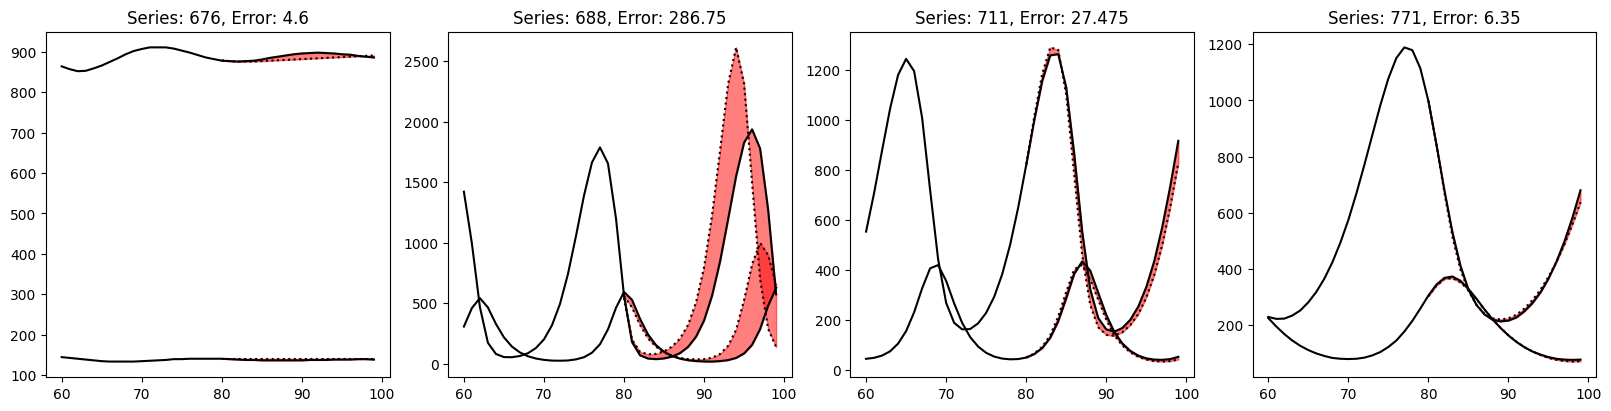

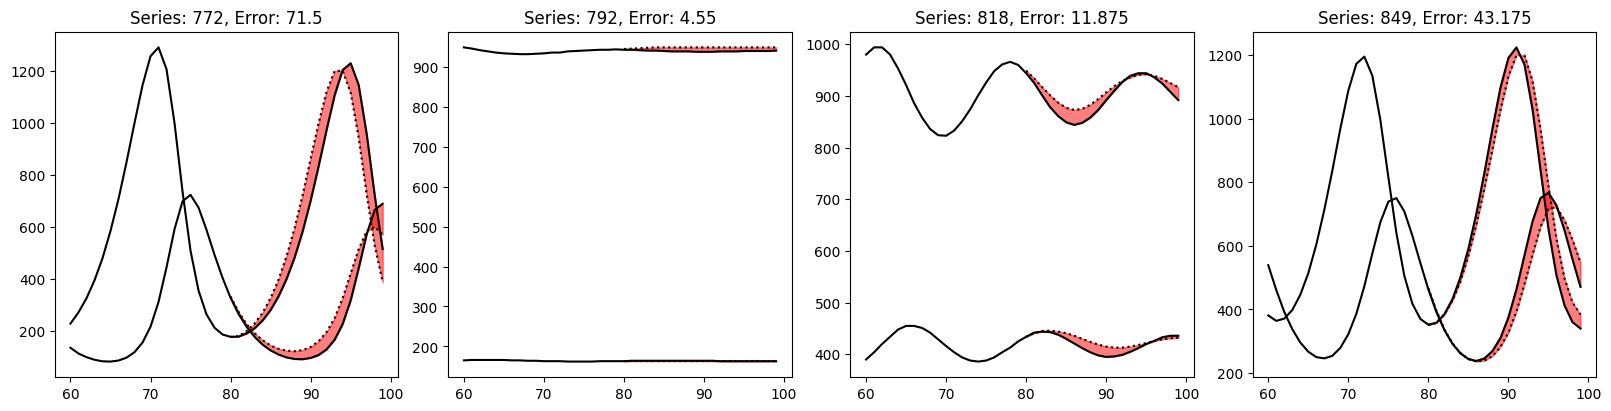

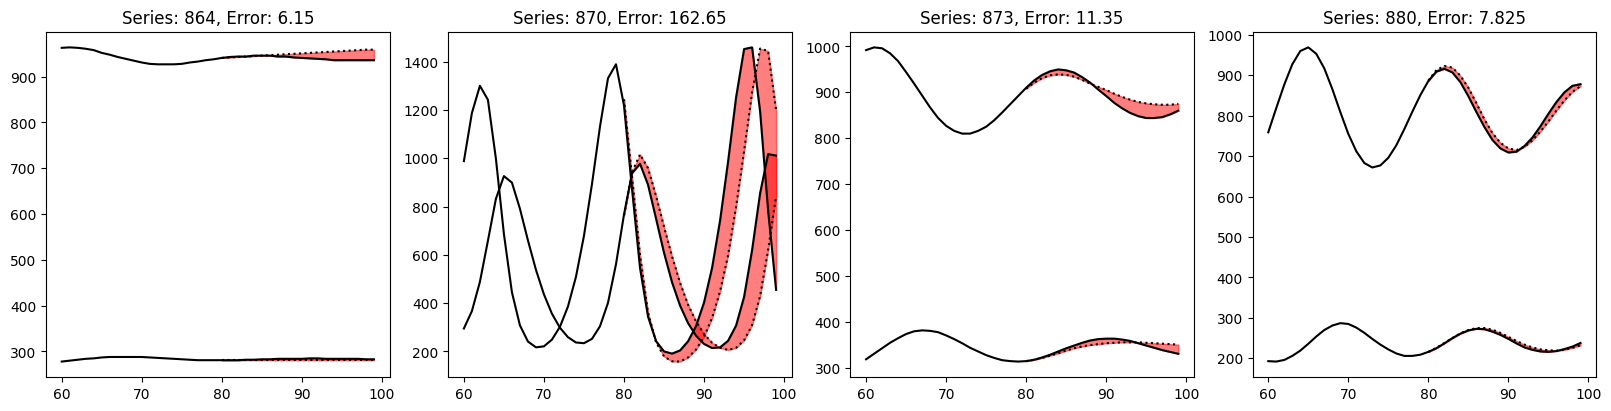

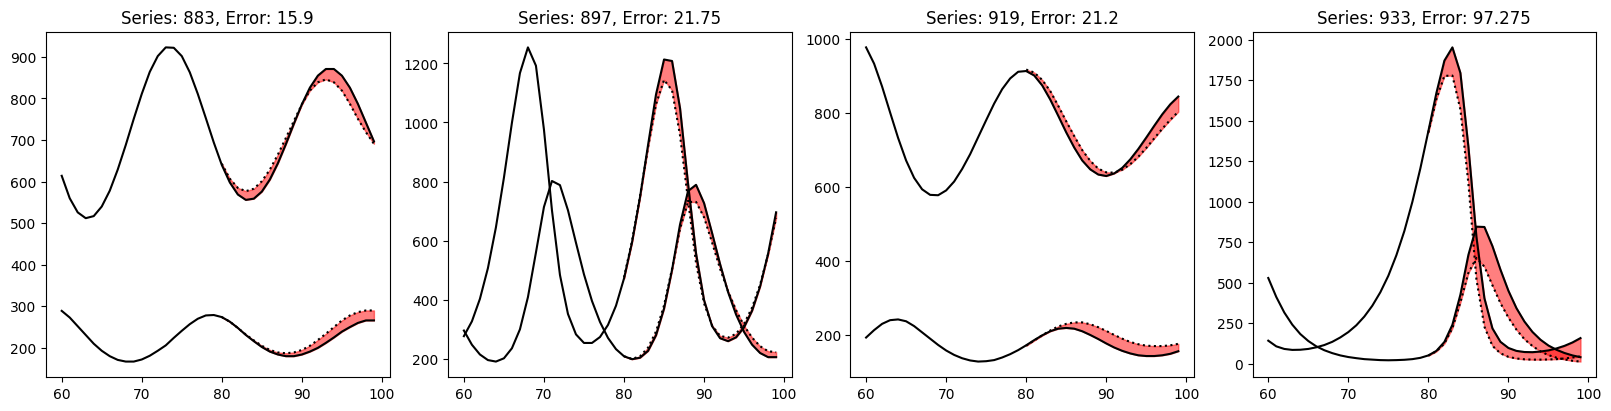

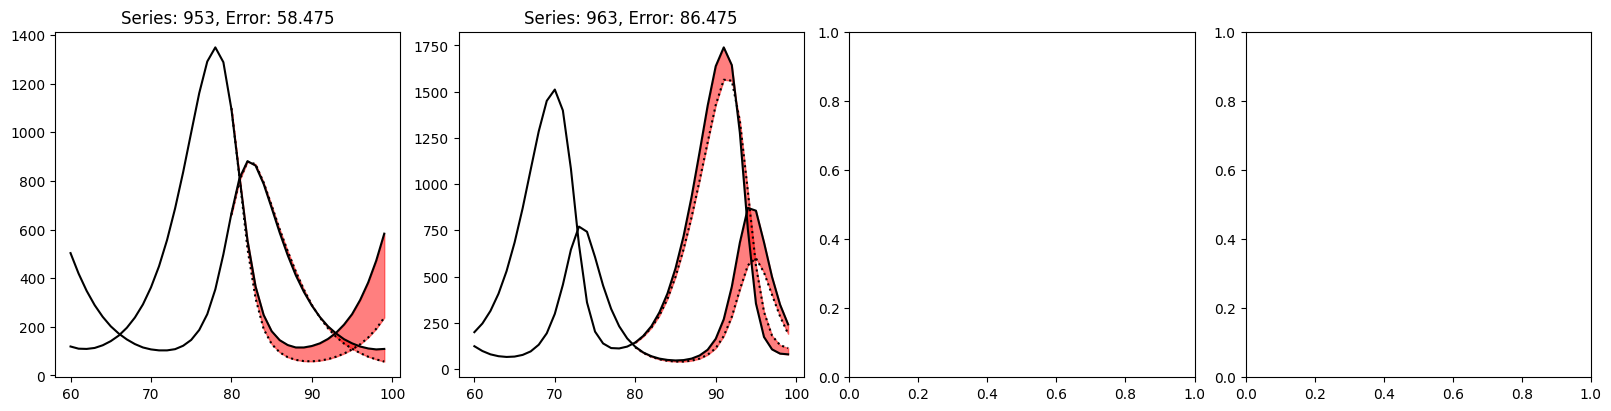

Untuned Model


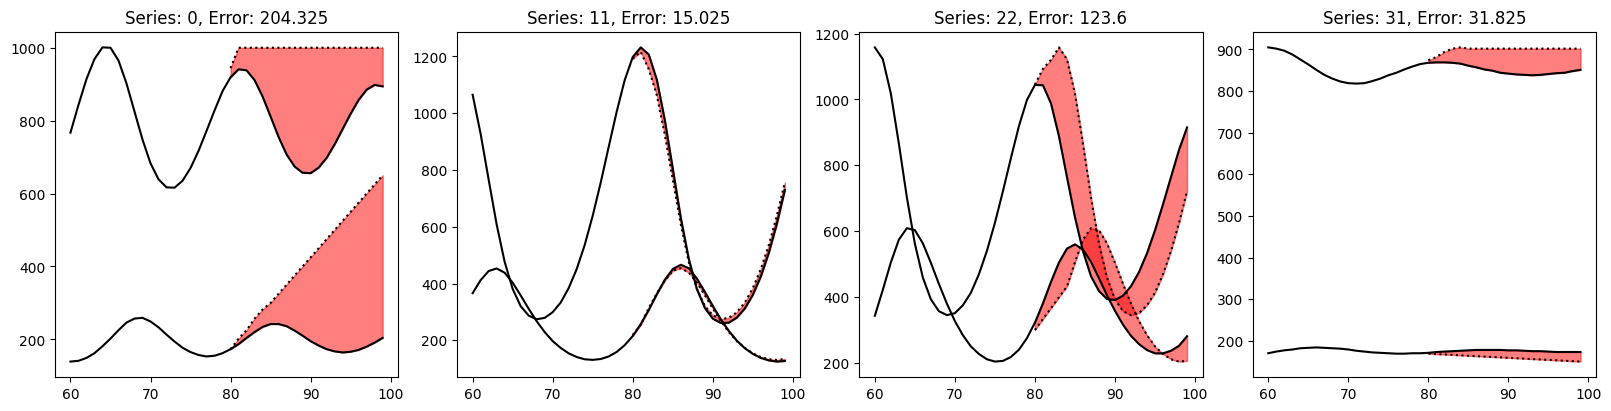

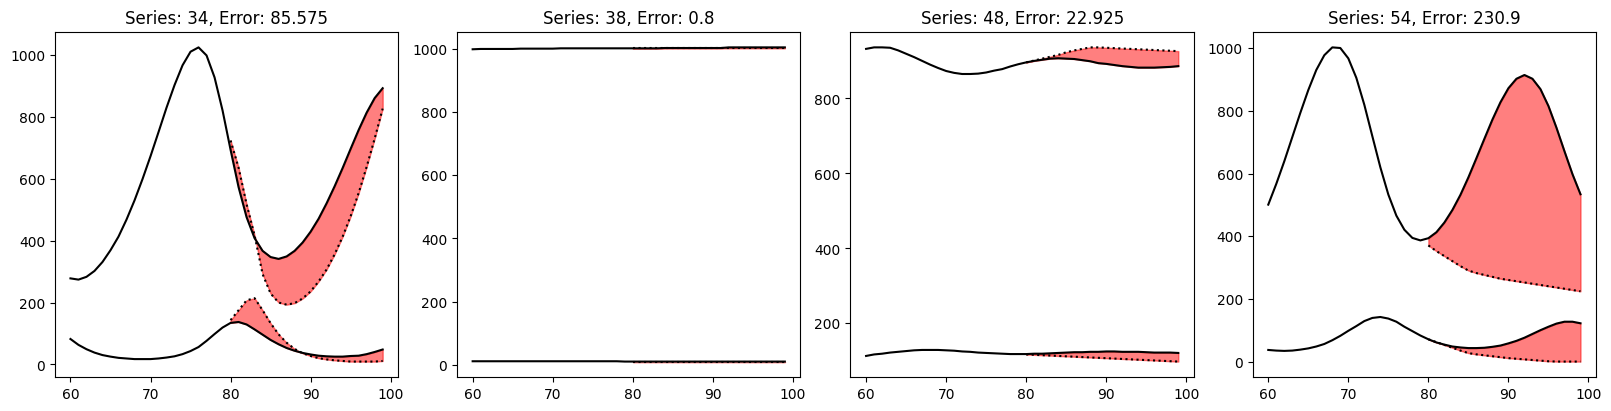

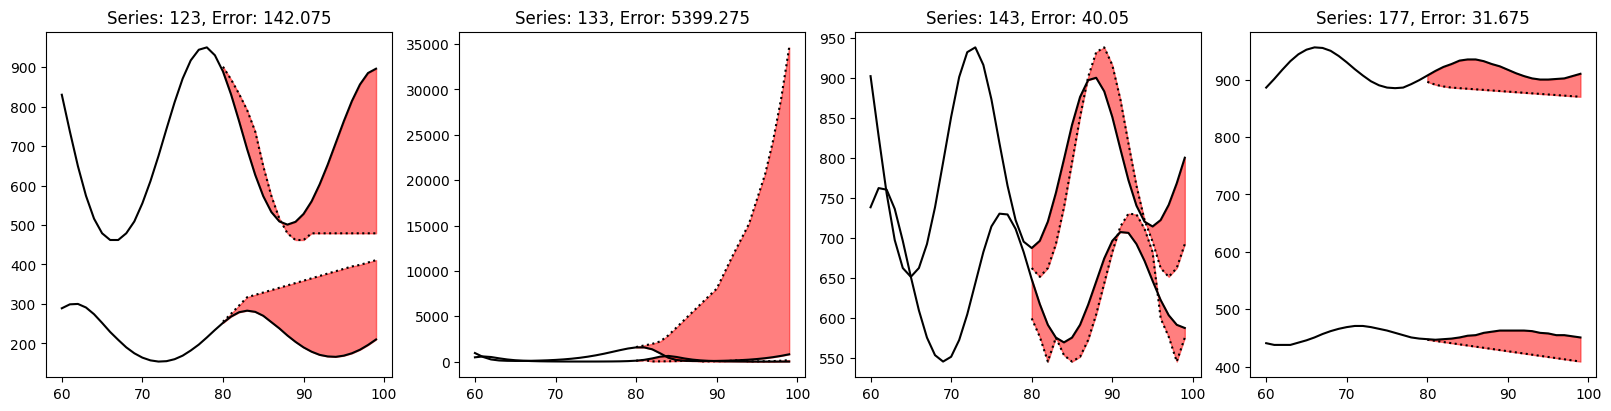

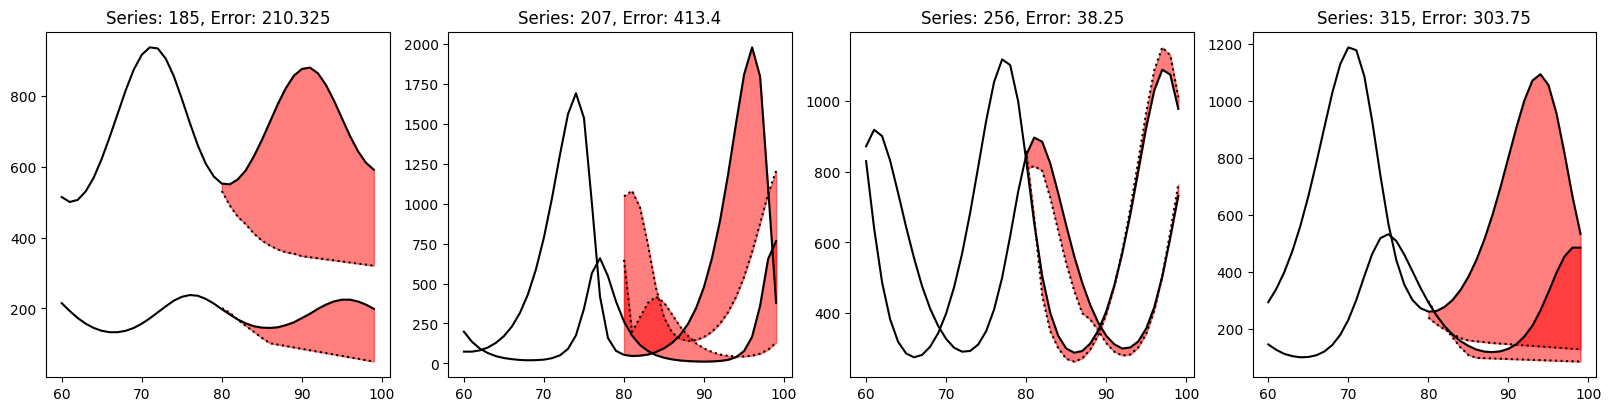

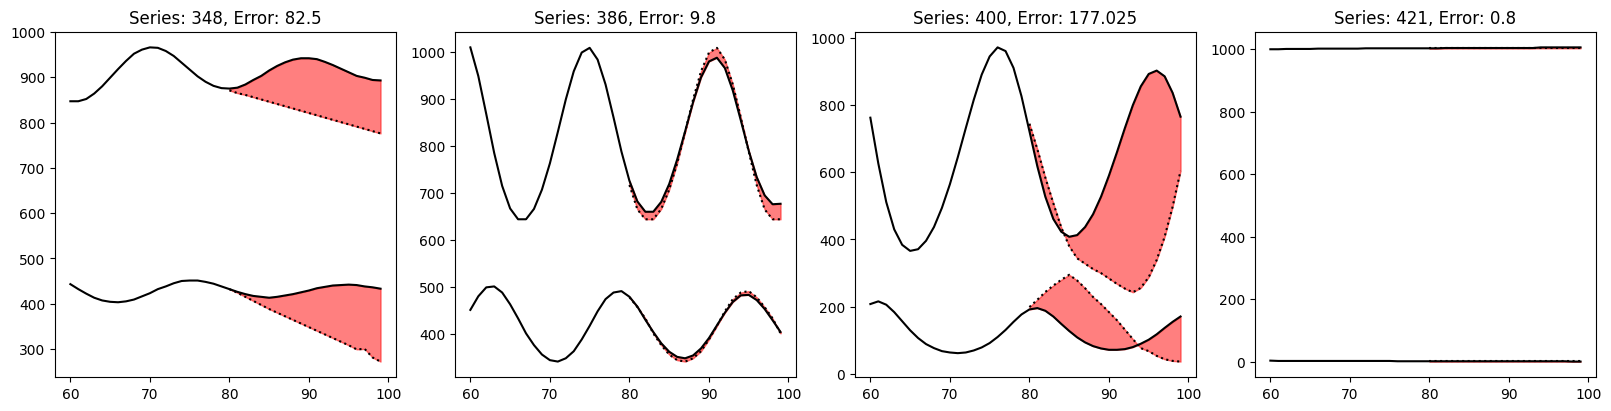

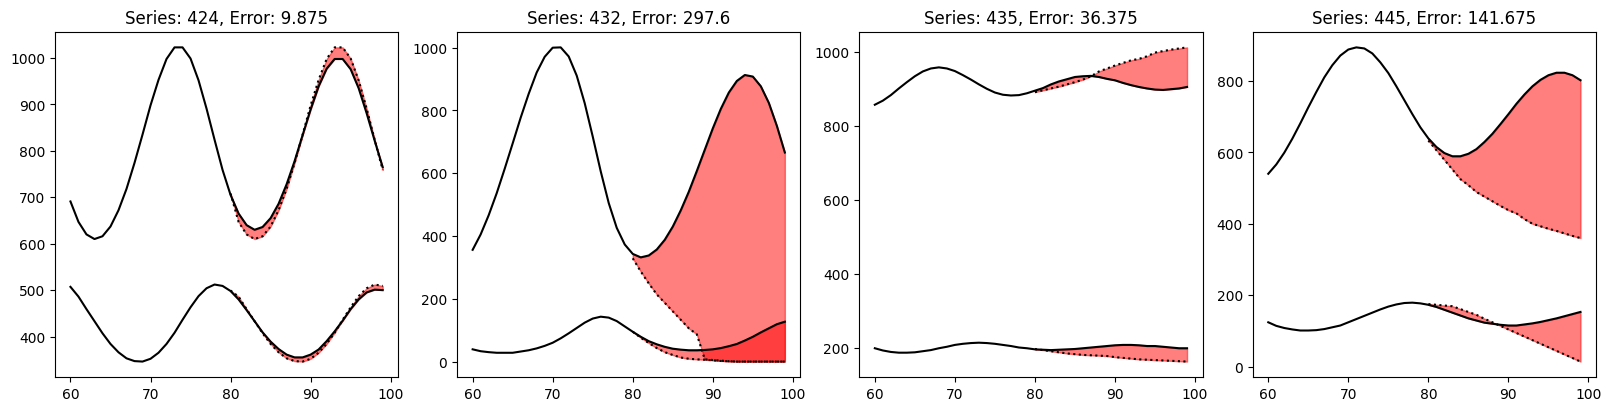

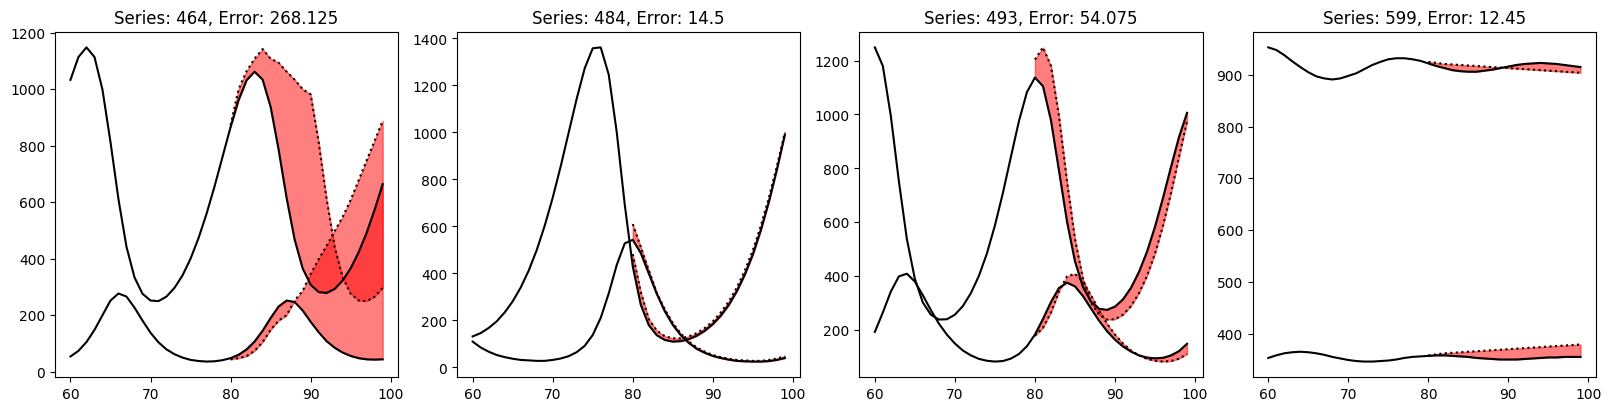

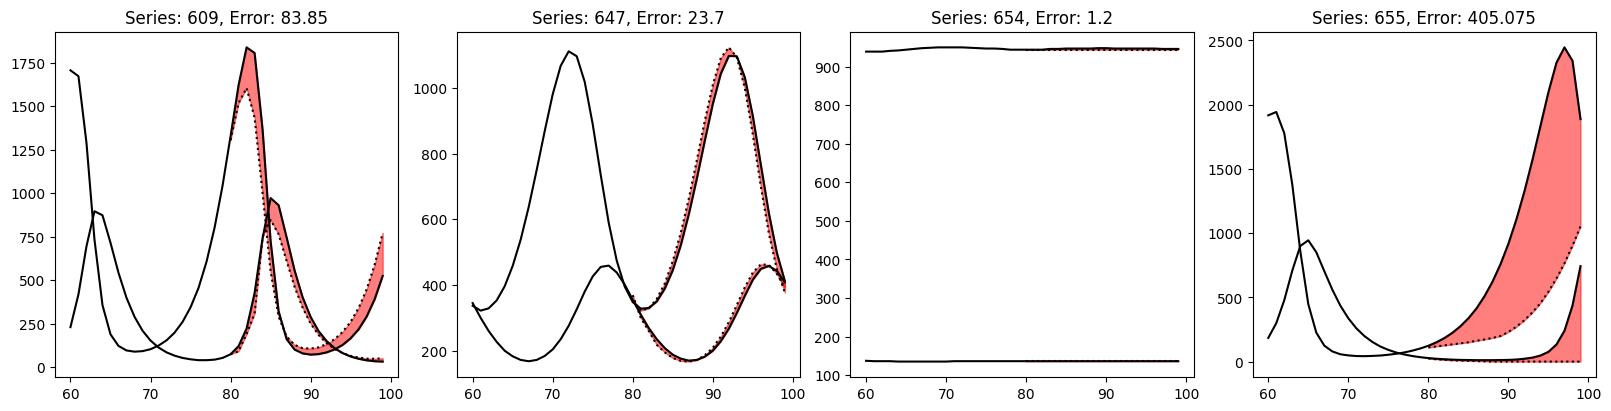

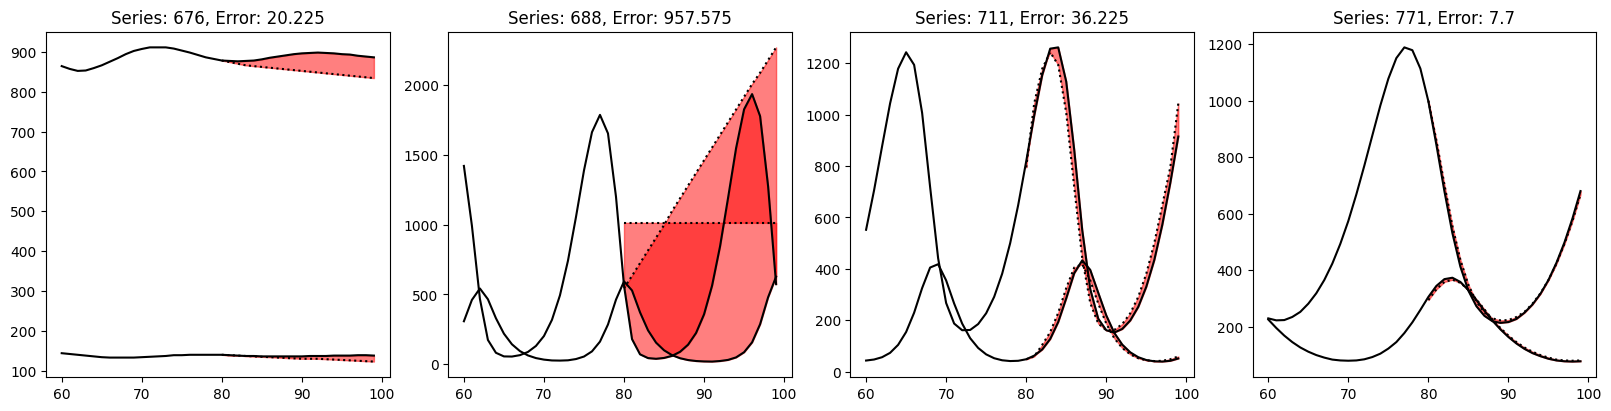

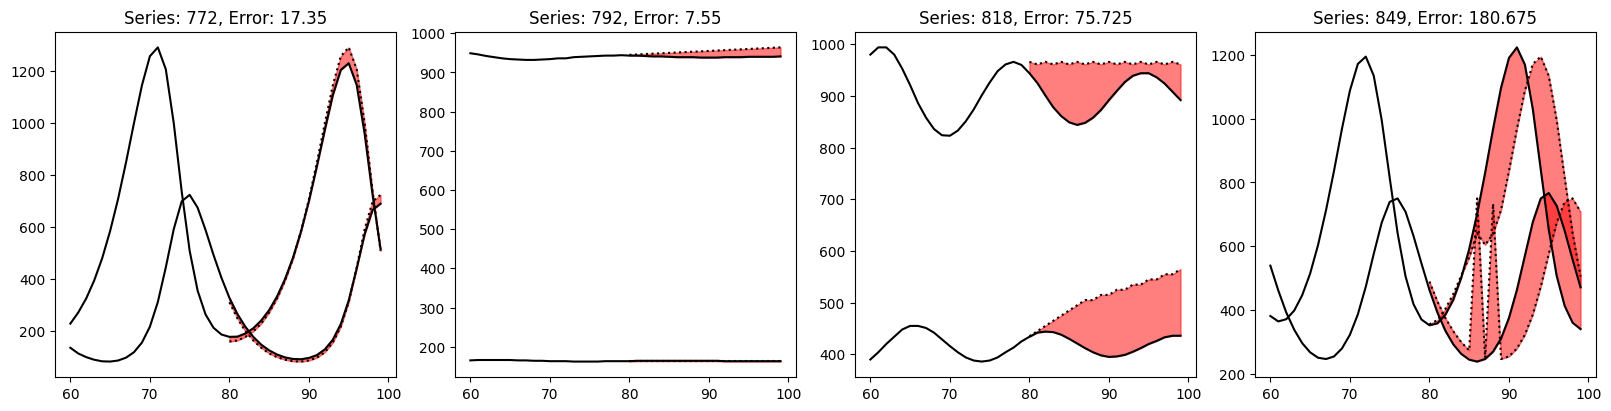

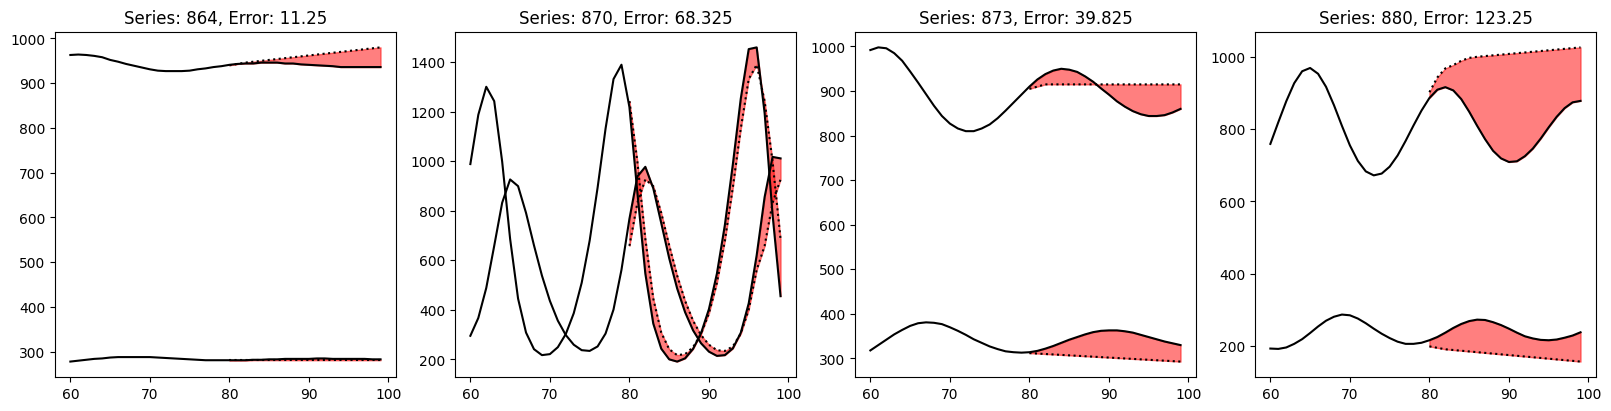

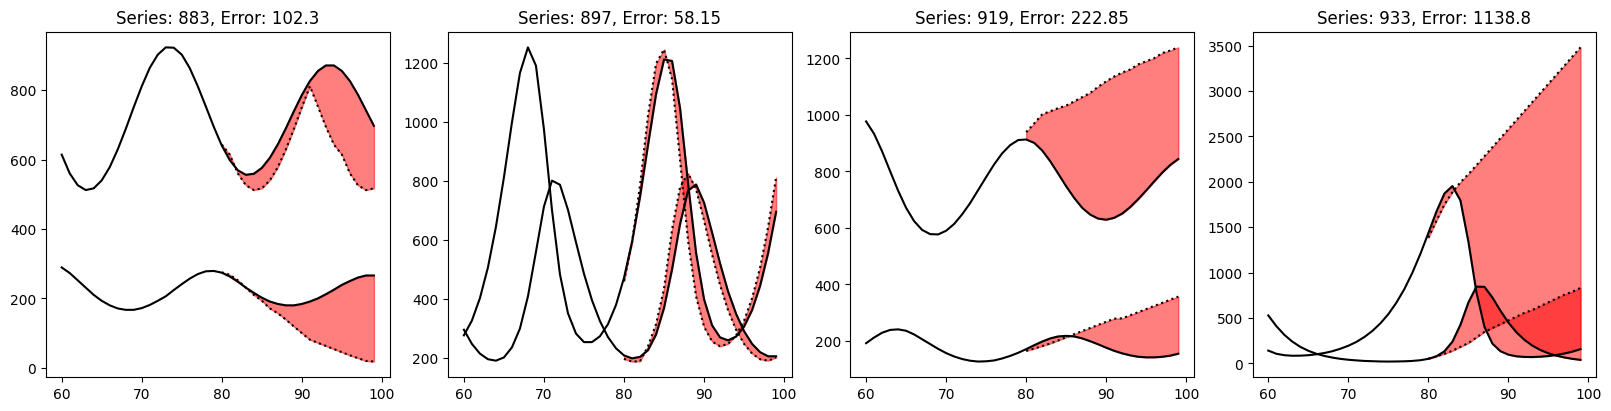

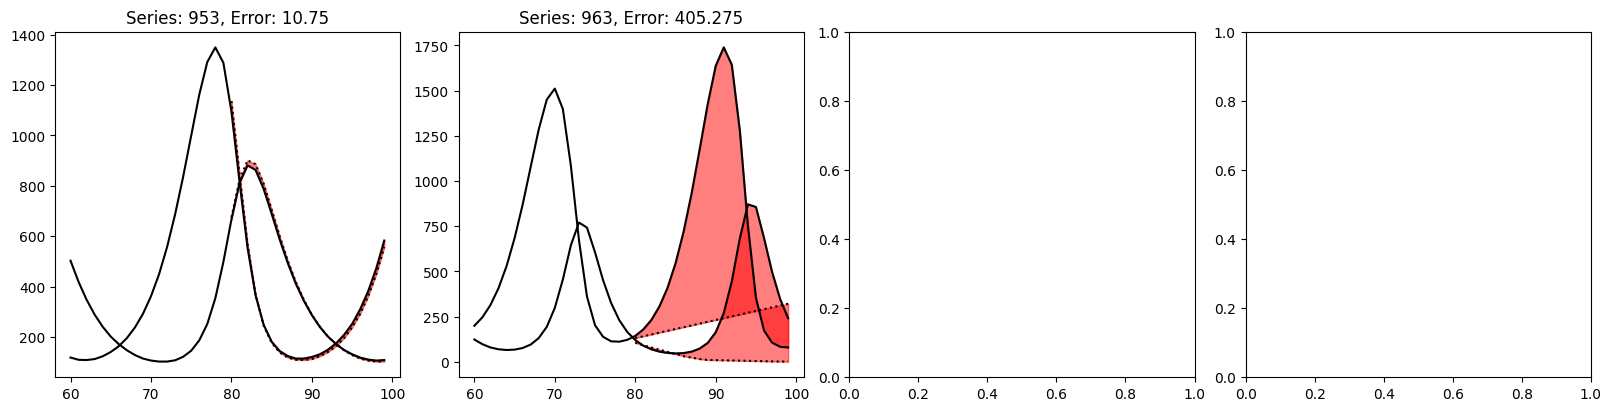

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from m2_cw.inference import visualise_forecasts

figpath = Path.cwd() / "figs"

final_figpath = figpath / "final"
final_figpath.mkdir(exist_ok=True, parents=True)

untuned_figpath = figpath / "untuned"
untuned_figpath.mkdir(exist_ok=True, parents=True)

file_paths = [ file for file in Path.cwd().iterdir() if "final_test_forecast" in str(file) ]
assert len(file_paths) == 1
file_path = file_paths[0]
print("Final Model")
df_final = visualise_forecasts(file_path=file_path, plots_per_row=4, prefix=20, eval_set="test", save=True, save_path=final_figpath)

file_paths = [ file for file in Path.cwd().iterdir() if "untuned_test_forecast" in str(file) ]
assert len(file_paths) == 1
file_path = file_paths[0]
print("Untuned Model")
df_untuned = visualise_forecasts(file_path=file_path, plots_per_row=4, prefix=20, eval_set="test", save=True, save_path=untuned_figpath)

Average MAE:
 - Untuned: 247.92
 - Final: 37.59


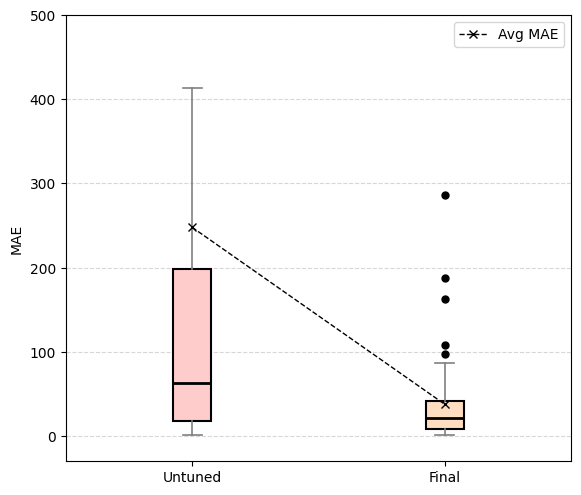

In [2]:
from m2_cw.inference import boxplot_maes

data = [df_untuned["MAE"].to_numpy(), df_final["MAE"].to_numpy()]
labels = ["Untuned", "Final"]
fig, ax = boxplot_maes(data, labels)
ax.set_ylim(-30, 500)
fig.savefig(figpath / "results_final")
plt.show();